STATISTICS - ML

#06 January 2020 - Statistics ~

In [8]:
import pandas as pd
import math
import statistics
import numpy as np
import scipy.stats
kulelah=pd.read_excel('./Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [26]:
#hapus kolom ga penting
kulelah.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)
kulelah.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [27]:
#ganti nama kolomnya
kulelah.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
kulelah.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [28]:
kulelah.columns.values

array(['Country', 'Continent', 'Region', 'DevName', 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

Case:
1. Descriptive statistics untuk setiap negara
2. Descriptive statistics untuk setiap region
3. Descriptive statitsics untuk setiap area

In [29]:
# Descriptive per negara
kulelah

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59


In [30]:
kulelah.columns.values

array(['Country', 'Continent', 'Region', 'DevName', 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

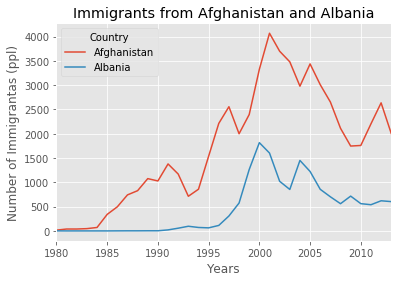

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use(['ggplot'])
nyoba_lagi = kulelah.copy()
nyoba_lagi=nyoba_lagi.set_index('Country')
years = list(range(1980,2014))
Jwb = nyoba_lagi.loc[['Afghanistan','Albania'],years]
Jwb_satu = Jwb.transpose ()
Jwb_satu.plot(kind='line')
plt.title('Immigrants from Afghanistan and Albania')
plt.ylabel('Number of Immigrantas (ppl)')
plt.xlabel('Years')
plt.show()

In [31]:
country = kulelah.copy()
country_total = country.groupby('Country',axis=0)[years].sum().sum(axis=1)
country_total

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Length: 195, dtype: int64

In [32]:
result = scipy.stats.describe(country_total, ddof=1, bias = False)
result

DescribeResult(nobs=195, minmax=(1, 691904), mean=32867.45128205128, variance=8424577769.032408, skewness=5.429676023665246, kurtosis=32.38472028053146)

In [33]:
results = country_total.describe()
results

count       195.000000
mean      32867.451282
std       91785.498686
min           1.000000
25%         952.000000
50%        5018.000000
75%       22239.500000
max      691904.000000
dtype: float64